In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [2]:
# import master dataframe
master_df = pd.read_csv('data/master_df.csv')

# drop rows with NaN
master_df.dropna(how='any',axis=0, inplace=True) 

# drop index
master_df.drop(master_df.columns[0], axis=1, inplace=True)

# one hot encode days of the week, month
master_df = pd.get_dummies(master_df, columns=['DAY_OF_WEEK','MONTH'])

In [3]:
master_df.head()

,Lat,Long,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,SHOOTING,UCR_PART,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,42.259518,-71.121563,9,59.0,0.00,0.0,454000.0,4.406696e+05,0.001234,563.0,0,Part One,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,42.262092,-71.116710,20,56.0,0.01,0.0,541300.0,4.528877e+05,0.000539,531.0,0,Part One,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,42.352375,-71.135096,15,56.0,0.01,0.0,259900.0,5.895101e+05,0.000167,1272.0,0,Part One,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,42.349476,-71.076402,4,56.0,0.01,0.0,492000.0,1.666753e+06,0.000074,4461.0,0,Part One,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,42.381846,-71.066551,8,71.0,0.22,0.0,836900.0,6.054951e+05,0.000108,2672.0,0,Part One,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
X, y = master_df.drop(['UCR_PART'], axis=1), master_df['UCR_PART']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42).fit(X_train, y_train)

In [6]:
accuracy_score(rf.predict(X_test), y_test)

0.5018229988014887

In [7]:
km = KMeans().fit(X_train[['Lat', 'Long']])

In [8]:
y_train_pred = km.predict(X_train[['Lat', 'Long']])

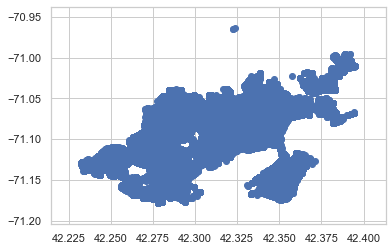

In [9]:
plt.scatter(X_train['Lat'], X_train['Long'])

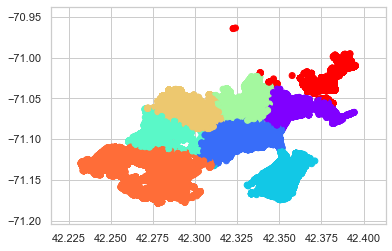

In [10]:
plt.scatter(X_train['Lat'],X_train['Long'], c=km.labels_, cmap='rainbow')